## Fortgeschrittene KI

In diesem Abschnitt werden die Daten der fortgeschrittenen KI/EA visualisiert.
Diese besitzt nun drei verschiedene Gene welche je nach Situation aktiviert werden.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_EA = pd.read_csv('Data/EA2.csv', index_col=[0], sep=';')

evolutions = df_EA.groupby(df_EA.index).size().iloc[:1].values # get the number of evolutions
KINumber = df_EA.groupby(df_EA.index).size().size # get the number of different KIs (individuals)
df_EA['Evolution'] = np.arange(evolutions).repeat(KINumber) # add new evolution column
df_EA = df_EA.reset_index().set_index(['Evolution', 'Name']) #make multiindex

### Calulate more Data for analysis
df_Mean = df_EA.groupby(level=0).agg(['mean']).stack(1) # calc mean for every evolution
df_Mean = df_Mean.reset_index().set_index(['Evolution']) #remove multiindex
df_Mean.drop(['Winner', "level_1"], axis=1, inplace=True) # remove useless columns
### Calculates the win percentage of each evolution.
df_wincounter = df_EA.groupby(level=0)['Winner'].value_counts().unstack(fill_value=0).stack().to_frame()
df_cleaned = df_wincounter.rename(columns={0: "WinPercent"}).reset_index().set_index(['Evolution'])
df_winner = df_cleaned.loc[df_cleaned['Winner'] == True]
df_winner.drop(['Winner'], axis=1) # remove useless columns
df_Mean['WinPercent'] = df_winner['WinPercent'].apply(lambda x: x / KINumber * 100) # calculate winpercentage
### Calculate standard deviation
df_standardDeviation = df_EA.std(axis = 0, skipna = True, level = 0)
df_standardDeviation.drop(['Winner', "Fitness", "Score", "GameTime"], axis=1, inplace=True)
df_EA

Coord  Winner  Fitness  Score  GameTime  \
Evolution Name                                                      
0         EA188  <3468, 5, 958>   False       10     10       844   
          EA183  <3468, 5, 958>   False       60     60       875   
          EA186  <3468, 5, 958>   False       -5     -5       647   
          EA178  <3468, 5, 958>   False       15     15       627   
          EA167  <3468, 5, 958>   False      150    150       914   
...                         ...     ...      ...    ...       ...   
69        EA51   <3468, 5, 958>   False      315    315       702   
          EA40   <3468, 5, 958>   False      435    435       878   
          EA42   <3468, 5, 958>   False      205    205       757   
          EA35   <3468, 5, 958>   False      540    540       915   
          EA5    <3468, 5, 958>   False     2453   2455      2057   

                 deff-ConquerRadius  deff-AttackMinLife  deff-SupportRadius  \
Evolution Name                                                                
0         EA188                 401                  36                3900   
          EA183                3936                  32                 964   
          EA186                2992                  31                2329   
          EA178                1117                   7                2685   
          EA167                1946                  28                3770   
...                             ...                 ...                 ...   
69        EA51                  426                  22                3619   
          EA40                  442                  18                3600   
          EA42                  164                   7                3923   
          EA35                  633                  27                3372   
          EA5                   118                  15                3975   

                 deff-SupportMaxCap  deff-SupportMinCap  ...  \
Evolution Name                                           ...   
0         EA188                  13                  74  ...   
          EA183                  82                  76  ...   
          EA186                  71                  94  ...   
          EA178                  26                  34  ...   
          EA167                  60                  49  ...   
...                             ...                 ...  ...   
69        EA51                   46                  13  ...   
          EA40                   51                  11  ...   
          EA42                   56                   6  ...   
          EA35                   48                  18  ...   
          EA5                    45                   5  ...   

                 off-SupportMinCap  supp-ConquerRadius  supp-AttackMinLife  \
Evolution Name                                                               
0         EA188                 96                2196                  79   
          EA183                 42                 176                  50   
          EA186                 27                1377                  65   
          EA178                 73                3126                   6   
          EA167                 58                1978                  18   
...                            ...                 ...                 ...   
69        EA51                  69                1296                  56   
          EA40                  70                1437                  57   
          EA42                  63                1390                  56   
          EA35                  62                1346                  56   
          EA5                   67                1487                  60   

                 supp-SupportRadius  supp-SupportMaxCap  supp-SupportMinCap  \
Evolution Name                                                                
0         EA188                1872                  63                  42   
          EA183

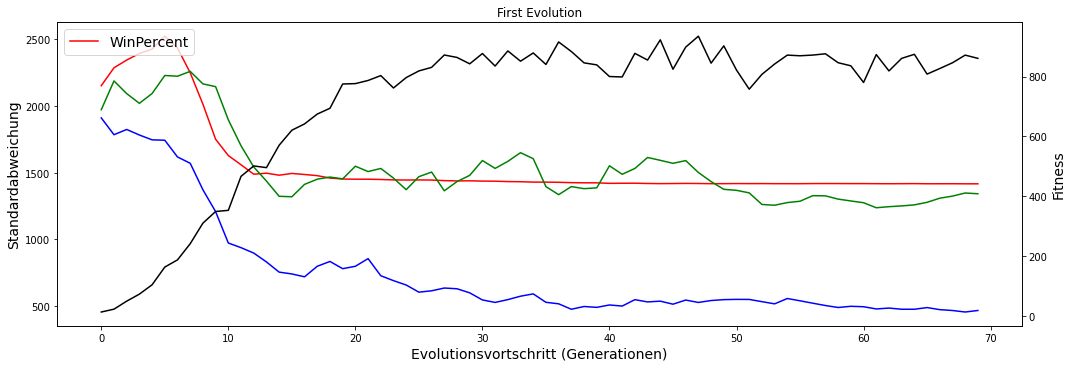

In [32]:
plt.rcParams["figure.figsize"] = (15,5)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Evolutionsvortschritt (Generationen)', fontsize=14)
ax1.set_ylabel('Standardabweichung', fontsize=14)

#WinPercent, = ax1.plot(df_Mean['WinPercent'].values, color='red', label='WinPercent')
Fitness, = ax1.plot(df_Mean["deff-ConquerRadius"].values, color='blue', label='Fitness')
Fitness, = ax1.plot(df_Mean["off-ConquerRadius"].values, color='red', label='Fitness')
Fitness, = ax1.plot(df_Mean["supp-ConquerRadius"].values, color='green', label='Fitness')
#std, = ax1.plot(df_standardDeviation["deff-AttackMinLife"].values, color='blue', label='RadiusExpansionStep')
#std1, = ax1.plot(df_standardDeviation["off-AttackMinLife"].values, color='red', label='MaxConquerRadius')
#std2, = ax1.plot(df_standardDeviation["supp-AttackMinLife"].values, color='green', label='InitialConquerRadius')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color='black'
ax2.set_ylabel('Fitness', color=color, fontsize=14)
#ax2.plot(df_Mean["GameTime"].values, color=color)
ax2.plot(df_Mean["Fitness"].values, color=color)
#ax2.plot(df_EA["Fitness"].values, color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.title('First Evolution')
plt.legend(handles = [WinPercent], fontsize=14)
plt.show()